## Reading the raw data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
raw_file_data = 'data/001_raw_data/top2010s.csv'
raw_data = pd.read_csv(raw_file_data, encoding='latin-1')

In [81]:
raw_data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [82]:
raw_data.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


This is Kaggle dataset with Spotify top songs for each year of the 2010's decade.

Dataset columns: 

1. ID
2. title: Song's title
3. artist: Song's artist
4. top genre: the genre of the track
5. year: Song's year in the Billboard
6. bpm: Beats per Minute - The tempo of the song
7. nrgy: Energy - The energy of a song *(the higher the value, the more energtic the song)*
8. dnce: Danceability *(The higher the value, the easier it is to dance to this song.)*
9. dB: Loudness in decibels *(The higher the value, the louder the song)*
10. live: Liveness *(The higher the value, the more likely the song is a live recording)*
11. val: Valence *(The higher the value, the more positive mood for the song.)*
12. dur: Length - The duration of the song.
13. acous: Acousticness *(The higher the value the more acoustic the song is.)*
14. spch: Speechiness *(The higher the value the more spoken word the song contains.)*
15. pop: Popularity *(The higher the value the more popular the song is.)*

In [83]:
raw_data.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [84]:
raw_data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [85]:
raw_data.columns

Index(['id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
       'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [86]:
viz_data = raw_data.drop(['id', 'title', 'artist'], axis=1)
viz_data.head(3)

,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


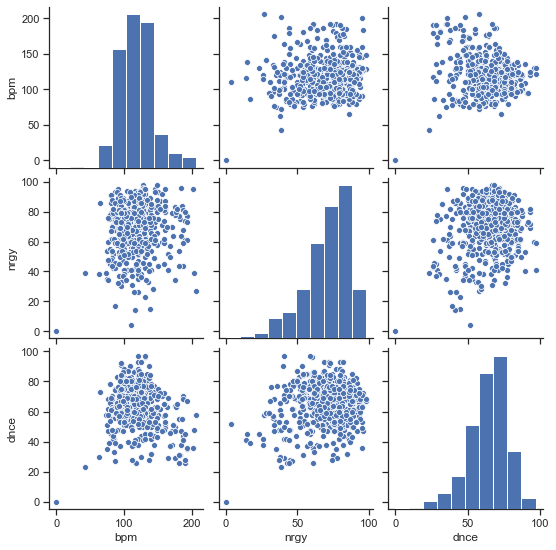

In [21]:
sns.pairplot(viz_data, vars=['bpm', 'nrgy', 'dnce'])

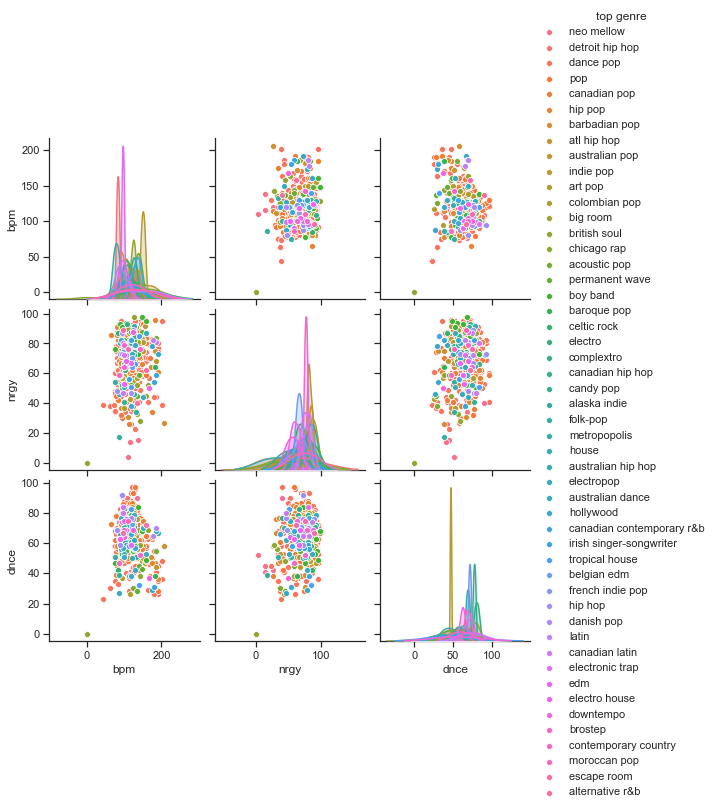

In [34]:
sns.pairplot(viz_data, vars=['bpm', 'nrgy', 'dnce'], hue='top genre')

In [22]:
viz_data['top genre'].describe()

count           603
unique           50
top       dance pop
freq            327
Name: top genre, dtype: object

In [87]:
raw_data.isna().sum()  # null values

id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

## Saving intermediate file

File with renamed column: ID (first column)

In [88]:
raw_data.head(3)

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80


In [90]:
raw_data.to_csv('data/002_intermediate_data/raw_renamed_data.csv', index=False, encoding='latin-1')